In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
df = pd.read_csv("data.xlsx - Sheet1.csv")

df.shape

(3998, 39)

In [2]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [5]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


# Step 1: Data Cleaning

In [6]:
# changing dtype to datetime

df['DOJ'] = pd.to_datetime(df['DOJ'])

In [7]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [8]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                          float64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [9]:
df = df.drop(columns=['Unnamed: 0'])   # Deleting unwanted columns

In [10]:
df.duplicated().sum()

0

In [11]:
def irregularities(dataframe):
    for col in dataframe.columns:
        unique_values = dataframe[col].unique()
        print(f"Column: {col}")
        print(f"{unique_values}")
        print("****"*10)
        print("\n")

# Call the function with your DataFrame
irregularities(df)


Column: ID
[203097 579905 810601 ... 355888 947111 324966]
****************************************


Column: Salary
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.  135000.
  785000.  210000.  155000.  355000.  535000.  690000.  260000. 1110000.
 100000

In [12]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


##### There are some irregularities present in some columns now we are modifing them one by one

# '12board'

In [13]:
from fuzzywuzzy import process
import pandas as pd

# Standardizing representation
board_mapping = {
    '0': 'Unknown',  
    'up': 'UP Board',  # Assuming 'up' stands for UP Board
    'upboard': 'UP Board',
    'karnataka pre university board': 'Karnataka Pre University Board',
    'p u board, karnataka': 'PU Board, Karnataka',
    'dept of pre-university education': 'Department of Pre-University Education',
    'bie': 'Board of Intermediate Education',
    'up board': 'UP Board',
    'state  board of intermediate education, andhra pradesh': 'Board of Intermediate Education, Andhra Pradesh',
    'karnataka state board': 'Karnataka State Board',
    'west bengal state council of technical education': 'West Bengal State Council of Technical Education',
    'wbchse': 'West Bengal Council of Higher Secondary Education',
    'maharashtra state board': 'Maharashtra State Board',
    'ssc': 'SSC',
    'isc board': 'ISC Board',
    'sda matric higher secondary school': 'SDA Matric Higher Secondary School',
    'uttar pradesh board': 'Uttar Pradesh Board',
    'kerala state hse board': 'Kerala State HSE Board',
    'hisher seconadry examination(state board)': 'Higher Secondary Examination (State Board)',
}


# Apply mapping to the '12board' column
df['12board'] = df['12board'].map(board_mapping).fillna(df['12board'])

# Correcting typos and variations using fuzzy matching
unique_boards = df['12board'].unique()

for board in unique_boards:
    if board not in board_mapping.values():
        matches = process.extract(board, board_mapping.values(), limit=1)
        if matches[0][1] >= 80:  # You can adjust the similarity threshold as needed
            corrected_board = matches[0][0]
            df['12board'] = df['12board'].replace({board: corrected_board})

# Display the modified DataFrame
print(df['12board'].unique())

['Board of Intermediate Education' 'cbse' 'Karnataka State Board'
 'UP Board' 'ISC Board' 'icse' 'Karnataka Pre University Board'
 'PU Board, Karnataka' 'Department of Pre-University Education'
 'Kerala State HSE Board' 'Unknown' 'bseb' 'chse' 'puc'
 'Board of Intermediate Education, Andhra Pradesh'
 'West Bengal State Council of Technical Education'
 'West Bengal Council of Higher Secondary Education'
 'Maharashtra State Board' 'SSC' 'SDA Matric Higher Secondary School'
 'Uttar Pradesh Board' 'ibe' 'chsc' 'isce' 'sbtet'
 'Higher Secondary Examination (State Board)' 'rbse' 'jkbose' 'hbse' 'pue'
 'hsc' 'electonincs and communication(dote)' 'apbie'
 'tamilnadu stateboard' 'cbse,new delhi' 'biec,patna' 'hsc pune' 'gsheb'
 'nagpur' 'st joseph hr sec school' 'ipe' 'kea' 'apsb'
 'international baccalaureate (ib) diploma' 'nios' 'ua' 'scte vt orissa'
 'matriculation' 'wbscte' 'bieap' 'msbte (diploma in computer technology)'
 'jharkhand acamedic council (ranchi)' 'biec' 'sjrcw' 'msbte'
 'sri s

# 'DOL'

In [14]:
# Convert 'DOL' to datetime
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')

# Replace 'present' with today's date
today_date = pd.to_datetime('today').strftime('%d/%m/%y')
df['DOL'] = df['DOL'].replace('present', today_date)

# Standardize date format
df['DOL'] = df['DOL'].dt.strftime('%d/%m/%y')

In [15]:

df['DOL'].unique()

array([nan, '01/03/15', '01/05/15', '01/07/15', '01/04/15', '01/10/14',
       '01/09/14', '01/06/14', '01/09/12', '01/12/13', '01/06/15',
       '01/10/13', '01/01/15', '01/04/14', '01/06/13', '01/03/12',
       '01/07/14', '01/02/13', '01/01/14', '01/04/13', '01/07/12',
       '01/05/14', '01/09/13', '01/02/15', '01/01/12', '01/08/15',
       '01/08/14', '01/12/15', '01/12/14', '01/05/12', '01/03/11',
       '01/07/11', '01/02/14', '01/12/11', '01/10/15', '01/11/14',
       '01/03/14', '01/11/11', '01/05/13', '01/07/13', '01/11/13',
       '01/01/11', '01/05/11', '01/02/12', '01/11/12', '01/06/12',
       '01/08/13', '01/03/05', '01/03/13', '01/10/12', '01/02/11',
       '01/02/10', '01/01/13', '01/06/11', '01/09/15', '01/04/12',
       '01/08/12', '01/04/11', '01/10/11', '01/11/15', '01/12/12',
       '01/09/11', '01/08/10', '01/08/11', '01/06/09', '01/03/08',
       '01/10/10'], dtype=object)

In [16]:
# Convert 'DOL' to datetime, replace 'present' with today's date
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce').fillna(pd.to_datetime('today'))

# Standardize date format
df['DOL'] = df['DOL'].dt.strftime('%d/%m/%y')


In [17]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,23/02/24,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,Board of Intermediate Education,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,23/02/24,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,23/02/24,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,23/02/24,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,03/01/15,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,10/01/12,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,2013-07-01,07/01/13,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,Karnataka State Board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,2013-07-01,23/02/24,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,2014-07-01,01/01/15,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,Karnataka State Board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


# '10board'

In [22]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'YourDataFrame' with your actual DataFrame name

# Correcting spelling mistakes and standardizing names
df['10board'] = df['10board'].str.lower().str.replace('board ofsecondary', 'board of secondary')
df['10board'] = df['10board'].str.replace('board of secondary education,', '').str.replace('board', '').str.strip()

# Replacing variations of the same board
df['10board'].replace({'cbse[gulf zone]': 'cbse',
                        'central board of secondary education': 'cbse',
                        'up board, allahabad': 'up board',
                        'up board allahabad': 'up board',
                        'up(allahabad)': 'up board',
                        'up borad': 'up board',
                        'u p': 'up board',
                        'u p board': 'up board',
                        'uttar pradesh': 'up board',
                        'uttar pradesh board': 'up board',
                        'uttaranchal board': 'uttarakhand board',
                        'uttarakhand board': 'uttarakhand board',
                        'bse,patna': 'bseb patna',
                        'jharkhand accademic council': 'jharkhand academic council',
                        'jharkhand secondary examination board': 'jharkhand academic council',
                        'jharkhand secondary examination board (ranchi)': 'jharkhand academic council',
                        'matric': 'matriculation',
                        'matric board': 'matriculation',
                        'maticulation': 'matriculation',
                        'sslc': 'state board',
                        'sslc board of andrapradesh': 'state board of andhra pradesh',
                        'ssc-andhra pradesh': 'state board of andhra pradesh',
                        'state(karnataka board)': 'karnataka state board',
                        'kseeb(karnataka secondary education examination board)': 'karnataka state board',
                        'kseeb': 'karnataka state board',
                        'kseb': 'kerala state board',
                        'ksseb': 'karnataka state board',
                        'ksseb(karnataka state board)': 'karnataka state board',
                        'hbse': 'haryana board',
                        'state board of karnataka': 'karnataka state board',
                        'state board ': 'state board',
                        'state board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'state board of secondary education,ap': 'state board of andhra pradesh',
                        'state board - west bengal board of secondary education : wbbse': 'west bengal board of secondary education',
                        'stmary higher secondary': 'st. mary higher secondary',
                        'rajasthan board ajmer': 'rajasthan board',
                        'msbshse,pune': 'maharashtra state board',
                        'maharashtra board, pune': 'maharashtra state board',
                        'maharashtra state board pune': 'maharashtra state board',
                        'maharashtra state board of secondary and higher secondary education,pune': 'maharashtra state board',
                        'maharashtra state board,pune': 'maharashtra state board',
                        'maharashtra state boar of secondary and higher secondary education': 'maharashtra state board',
                        'maharashtra state board mumbai divisional board': 'maharashtra state board',
                        'maharashtra state board for ssc': 'maharashtra state board',
                        'maharashtra state board of secondary & higher secondary education': 'maharashtra state board',
                        'maharastra board': 'maharashtra state board',
                        'maharastra board': 'maharashtra state board',
                        'maharastra board': 'maharashtra state board',
                        'maharashtra state board of secondary and higher secondary education': 'maharashtra state board',
                        'maharashtra sate board': 'maharashtra state board',
                        'mumbai board': 'maharashtra state board',
                        'mumbai board': 'maharashtra state board',
                        'mp board': 'mp board bhopal',
                        'mpboard': 'mp board bhopal',
                        'mhsbse': 'maharashtra state board',
                        'mhsbse': 'maharashtra state board',
                        'sslc,karnataka': 'karnataka state board',
                        'sslc board': 'state board',
                        'state board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'ss pune': 'state board',
                        'state board of secondary education, ap': 'state board of andhra pradesh',
                        'state boardmp board ': 'mp board bhopal',
                        'seba(assam)': 'assam board',
                        'ssc': 'state board',
                        'ssc board of andrapradesh': 'state board of andhra pradesh',
                        'ssc maharashtra board': 'maharashtra state board',
                        'ssc board of andrapradesh': 'state board of andhra pradesh',
                        'uttar pradesh board': 'up board',
                        'west bengal board of secondary examination (wbbse)': 'west bengal board of secondary education',
                        'west bengal  board of secondary education': 'west bengal board of secondary education',
                        'bse,orissa': 'board of secondary education, odisha',
                        'hse,board': 'hse,orissa',
                        'secondary state certificate': 'state board',
                        'karnataka board of secondary education': 'karnataka state board',
                        'state board of secondary education, ap': 'state board of andhra pradesh',
                        'secondary board of rajasthan': 'rajasthan board',
                        'uttaranchal shiksha avam pariksha parishad': 'uttarakhand board',
                        'west bengal board of secondary eucation': 'west bengal board of secondary education',
                        'west bengal board of secondary education': 'west bengal board of secondary education',
                        'state board of secondary education, ap': 'state board of andhra pradesh',
                        'state board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'state board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'state board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'state board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'state board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'stjosephs girls higher sec school,dindigul': 'st. joseph\'s girls higher secondary school, dindigul',
                        'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district': 'st. joseph of cluny matriculation higher secondary school, neyveli, cuddalore district',
                        'sri kannika parameswari highier secondary school, udumalpet': 'sri kannika parameswari higher secondary school, udumalpet',
                        'stmary\'s convent inter college': 'st. mary\'s convent inter college',
                        'cbsc': 'cbse',
                        'cbse ': 'cbse',
                        'apssc': 'andhra pradesh state board',
                        'kolhapur divisional board, maharashtra': 'maharashtra state board',
                        'nagpur board,nagpur': 'nagpur board',
                        'rajasthan board of secondary education': 'rajasthan board',
                        'jharkhand secondary board': 'jharkhand academic council',
                        'board of secondary education,orissa': 'board of secondary education, odisha',
                        'maharashtra nasik board': 'maharashtra state board',
                        'haryana board of school education': 'haryana board',
                        'ghseb': 'gseb',
                        'cicse': 'icse',
                        'tn state board': 'tamil nadu state board',
                        'ap state board': 'andhra pradesh state board',
                        'ap state board for secondary education': 'andhra pradesh state board',
                        'secondary school education': 'state board',
                        'rajasthan board ajmer': 'rajasthan board',
                        'maharashtra state board,pune': 'maharashtra state board',
                        'cbse board': 'cbse',
                        'up bourd': 'up board',
                        'dav public school sec 14': 'dav public school, sec 14',
                        'pseb': 'punjab school education board',
                        'punjab school education board, mohali': 'punjab school education board',
                        'haryana board of school education,': 'haryana board',
                        'council for indian school certificate examination': 'cisce',
                        'aurangabad board': 'maharashtra state board',
                        'j&k state board of school education': 'jkbose',
                        'maharashtra state board of secondary and higher secondary education': 'maharashtra state board',
                        'kseeb(karnataka secondary education examination board)': 'karnataka state board',
                        'gsheb': 'gseb',
                        'ms board': 'maharashtra state board',
                        'board of secondary education,rajasthan(rbse)': 'rajasthan board',
                        'board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'board of secondary education orissa': 'board of secondary education, odisha',
                        'board of secondary education,ap': 'state board of andhra pradesh',
                        'board of secondary education,andhra pradesh': 'state board of andhra pradesh',
                        'kseeb(karnataka state board)': 'karnataka state board',
                        'kseeb': 'karnataka state board',
                        'hbse': 'haryana board',
                        'cbse[gulf zone]': 'cbse',
                        'jharkhand accademic council': 'jharkhand academic council',
                        'jharkhand secondary examination board (ranchi)': 'jharkhand academic council',
                        'karnataka secondary education examination board': 'karnataka state board',
                        'delhi board': 'cbse',
                        'jseb': 'jharkhand academic council',
                        'bse, odisha': 'board of secondary education, odisha',
                        'bihar board': 'bseb patna',
                        'maharashtra state(latur board)': 'maharashtra state board',
                        'rajasthan board': 'rajasthan board',
                        'mpboard': 'mp board bhopal',
                        'upbhsie': 'up board',
                        'secondary board of rajasthan': 'rajasthan board',
                        'tamilnadu matriculation board': 'tamil nadu state board',
                        'jharkhand secondary education board': 'jharkhand academic council',
                        'himachal pradesh board': 'himachal pradesh board',
                        'maharashtra': 'maharashtra state board',
                        'karnataka state secondary education board': 'karnataka state board',
                        'certificate of middle years program of ib': 'ib',
                        'karnataka board of secondary education': 'karnataka state board',
                        'board of secondary education rajasthan': 'rajasthan board',
                        'uttarakhand board': 'uttarakhand board',
                        'ua': 'uttarakhand board',
                        'board of secendary education orissa': 'board of secondary education, odisha',
                        'karantaka secondary education and examination borad': 'karnataka state board',
                        'hbsc': 'haryana board',
                        'kseeb(karnataka secondary education examination board)': 'karnataka state board',
                        'cbse[gulf zone]': 'cbse',
                        'hbse': 'haryana board',
                        'state(karnataka board)': 'karnataka state board',
                        'jharkhand accademic council': 'jharkhand academic council',
                        'jharkhand secondary examination board (ranchi)': 'jharkhand academic council',
                        'karnataka secondary education examination board': 'karnataka state board',
                        'delhi board': 'cbse',
                        'mirza ahmed ali baig': 'mirza ahmed ali baig',
                        'jseb': 'jharkhand academic council',
                        'bse, odisha': 'board of secondary education, odisha'}, inplace=True)

# Removing invalid or irrelevant entries
df = df[df['10board'] != '0']

# Verify the changes
print(df['10board'].unique())


['ap' 'cbse' 'state' 'mp  bhopal' 'icse'
 'karnataka secondary school of examination' 'up'
 'karnataka state education examination' 'state board'
 'kerala state technical education' 'bseb' 'state  andhra pradesh'
 'matriculation' 'gujarat state' 'karnataka state' 'wbbse'
 'maharashtra state' 'of secondary education(bse) orissa'
 'little jacky matric higher secondary school' 'up board' 'bsc,orissa'
 'mp' 'j & k bord' 'rbse' 'central  of secondary education'
 'punjab school education board' 'jkbose'
 'haryana  of school education,(hbse)' 'metric' 'ms'
 'karnataka state board' 'karnataka secondory education' 'mumbai'
 'kerala state board' 'secondary  education' 'of secondary education'
 'west bengal  of secondary education'
 'jharkhand secondary examination ,ranchi' 'bseb,patna' 'hsc' 'bse'
 'sss pune' 'karnataka education  (keeb)' 'kerala'
 'state  of secondary education( ssc)' 'gseb' 'nagpur'
 'don bosco maatriculation school' 'karnataka state secondary education'
 'maharashtra state bo

# 'Designation'

In [23]:
# Replace common spelling mistakes or non-relevant terms
designation_mapping = {
    'get': 'graduate engineer trainee',
    'ase': 'assistant system engineer',
    'executive hr': 'hr executive',
    'sr. engineer': 'senior engineer',
    'software enginner': 'software engineer',
    'software devloper': 'software developer',
    'rf/dt engineer': 'rf engineer',
    # Add more replacements as needed
}

# Use .loc to explicitly modify the original DataFrame
df.loc[:, 'Designation'] = df['Designation'].replace(designation_mapping)

In [24]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'graduate engineer trainee',
       'system engineer', 'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst',
       'assistant system engineer', 'telecommunication engineer',
       'application developer', 'ios developer', 'executive assistant',
       'online marketing manager', 'documentation specialist',
       'associate software engineer', 'management trainee',
       'site manager', 'software developer', '.net developer',
       'production engineer', 'jr. software engineer',
       'traine

# "JobCity"

In [25]:
df['JobCity'].nunique()

312

In [26]:
# Convert to lowercase
df['JobCity'] = df['JobCity'].str.lower()

In [27]:
correction = {
    'a-64,sec-64,noida': 'noida',
    'am': 'ambala',
    'ambala city': 'ambala',
    'banagalore': 'bangalore',
    'banaglore': 'bangalore',
    'asifabadbanglore': 'bangalore',
    'bengaluru': 'bangalore',
    'banglore': 'bangalore',
    'bhubaneshwar': 'bhubaneswar',
    'bhubneshwar': 'bhubaneswar',
    'chennai & mumbai': 'chennai',
    'chennai, bangalore': 'chennai',
    'delhi/ncr': 'delhi',
    'dubai': 'india',
    'gaziabaad': 'ghaziabad',
    'gazibaad': 'ghaziabad',
    'indirapuram, ghaziabad': 'ghaziabad',
    'gandhinagar': 'gandhi nagar',
    'greater noida': 'noida',
    'guragaon': 'gurgaon',
    'gurga': 'gurgaon',
    'gurgoan': 'gurgaon',
    'hderabad': 'hyderabad',
    'hyderabad(bhadurpally)': 'hyderabad',
    'jeddah saudi arabia': 'india',
    'kochi/cochin': 'kochi',
    'kochi/cochin, chennai and coimbatore': 'kochi',
    'kolkata`': 'kolkata',
    'kudankulam ,tarapur': 'kudankulam',
    'latur (maharashtra )': 'latur',
    'mettur, tamil nadu': 'mettur',
    'muzaffarnagar': 'muzaffarpur',
    'muzzafarpur': 'muzaffarpur',
    'navi mumbai': 'mumbai',
    'navi mumbai , hyderabad': 'mumbai',
    'new dehli': 'delhi',
    'new delhi': 'delhi',
    'dehli': 'delhi',
    'new delhi - jaisalmer': 'delhi',
    'nouda': 'noida',
    'pondi': 'pondicherry',
    'pondy': 'pondicherry',
    'punr': 'pune',
    'rayagada, odisha': 'odisha',
    'orissa': 'odisha',
    'sadulpur,rajgarh,distt-churu,rajasthan': 'sadulpur',
    'sonipat': 'sonepat',
    'tirupati': 'tirupathi',
    'technopark, trivandrum': 'trivandrum',
    'una': 'unnao',
    'vizag': 'visakhapatnam',
    'vsakhapttnam': 'visakhapatnam',
    'kalmar, sweden': 'kalmar'
}

# Apply corrections, handling NaN values
df['JobCity'] = df['JobCity'].apply(lambda x: correction.get(str(x).lower(), x) if pd.notna(x) else x)

In [28]:
df['JobCity'].nunique()

199

# 'Specialization'

In [29]:
df['Specialization'].nunique()

46

In [30]:
# Standardizing representation for engineering specializations
specialization_mapping = {
    'computer engineering': 'Computer Engineering',
    'electronics and communication engineering': 'Electronics and Communication Engineering',
    'information technology': 'Information Technology',
    'computer science & engineering': 'Computer Science and Engineering',
    'mechanical engineering': 'Mechanical Engineering',
    'electronics and electrical engineering': 'Electronics and Electrical Engineering',
    'electronics & telecommunications': 'Electronics and Telecommunications',
    'instrumentation and control engineering': 'Instrumentation and Control Engineering',
    'computer application': 'Computer Application',
    'electronics and computer engineering': 'Electronics and Computer Engineering',
    'electrical engineering': 'Electrical Engineering',
    'applied electronics and instrumentation': 'Applied Electronics and Instrumentation',
    # Add more mappings as needed
}

# Update the specialization column with standardized values
df['Specialization'] = df['Specialization'].replace(specialization_mapping)


# 'Domain'

In [31]:
# Assuming df is your DataFrame and 'Domain' is the column of interest
domain_column = df['Domain']

# Check for values outside the [0, 1] range
irregular_values = domain_column[(domain_column < 0) | (domain_column > 1)]

if not irregular_values.empty:
    # Handle irregularities, for example, replace with NaN
    df['Domain'] = np.where((df['Domain'] < 0) | (df['Domain'] > 1), np.nan, df['Domain'])

In [32]:
df['Domain'].unique()

array([0.63597876, 0.96060325, 0.45087658, 0.97439611, 0.12450207,
              nan, 0.35653649, 0.8295846 , 0.69447933, 0.49359639,
       0.76567358, 0.9682375 , 0.22948175, 0.53838689, 0.30840058,
       0.91139528, 0.56326782, 0.86468541, 0.64938971, 0.74475835,
       0.88412251, 0.88162007, 0.20739217, 0.48674701, 0.67074315,
       0.62264292, 0.41383826, 0.52592258, 0.73579571, 0.13044174,
       0.23780284, 0.11213944, 0.06696071, 0.08005528, 0.92564577,
       0.84312373, 0.91686996, 0.78330354, 0.60005718, 0.79293628,
       0.79358061, 0.16563309, 0.75537512, 0.99990456, 0.33878635,
       0.91077016, 0.98205712, 0.84224832, 0.01854094, 0.05316031,
       0.94211655, 0.12301673, 0.48834798, 0.37605959, 0.10487136,
       0.60064396, 0.70409041, 0.14478989, 0.81941653, 0.65576694,
       0.02106623, 0.44461772, 0.83762073, 0.72598415, 0.95389978,
       0.04099931, 0.02196911, 0.3423149 , 0.53586282, 0.90148957,
       0.96177212, 0.67964464, 0.93839914, 0.19015341, 0.99000

In [33]:
# Checking for missing values
missing_values = np.isnan(df['Domain']).any()

# Checking for values outside the range [0, 1]
out_of_range_values = (df['Domain'] < 0) | (df['Domain'] > 1)

# Displaying results
print("Missing Values:", missing_values)
print("Out of Range Values:", out_of_range_values.any())

Missing Values: True
Out of Range Values: False


# 'ComputerProgramming'

In [34]:
# Handling irregularities in the "ComputerProgramming" column
# Replace negative values with NaN
df['ComputerProgramming'] = df['ComputerProgramming'].apply(lambda x: x if x >= 0 else None)

# Replace unusually high values with NaN (adjust the threshold as needed)
max_allowed_value = 1000
df['ComputerProgramming'] = df['ComputerProgramming'].apply(lambda x: x if (x is None or x <= max_allowed_value) else None)

# 'ElectronicsAndSemicon'

In [35]:
# Handling irregularities in the "ElectronicsAndSemicon" column
# Replace negative values with NaN
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].apply(lambda x: x if x >= 0 else None)

# Replace unusually high values with NaN (adjust the threshold as needed)
max_allowed_value_electronics = 1000
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].apply(lambda x: x if (x is None or x <= max_allowed_value_electronics) else None)


# 'ComputerScience'

In [36]:
# Handling irregularities in the "ComputerScience" column
# Replace negative values with NaN
df['ComputerScience'] = df['ComputerScience'].apply(lambda x: x if x >= 0 else None)

# Replace unusually high values with NaN (adjust the threshold as needed)
max_allowed_value_cs = 1000
df['ComputerScience'] = df['ComputerScience'].apply(lambda x: x if (x is None or x <= max_allowed_value_cs) else None)


# 'MechanicalEngg'

In [37]:
# Handling irregularities in the "MechanicalEngg" column
# Replace negative values with NaN
df['MechanicalEngg'] = df['MechanicalEngg'].apply(lambda x: x if x >= 0 else None)

# Replace unusually high values with NaN (adjust the threshold as needed)
max_allowed_value_mechanical = 1000
df['MechanicalEngg'] = df['MechanicalEngg'].apply(lambda x: x if (x is None or x <= max_allowed_value_mechanical) else None)


# ElectricalEngg

In [38]:
# Handling irregularities in the "ElectricalEngg" column
# Replace negative values with NaN
df['ElectricalEngg'] = df['ElectricalEngg'].apply(lambda x: x if x >= 0 else None)

# Replace unusually high values with NaN (adjust the threshold as needed)
max_allowed_value = 1000
df['ElectricalEngg'] = df['ElectricalEngg'].apply(lambda x: x if (x is None or x <= max_allowed_value) else None)


# 'TelecomEngg'

In [39]:
# Handling irregularities in the "TelecomEngg" column
# Replace negative values with NaN
df['TelecomEngg'] = df['TelecomEngg'].apply(lambda x: x if x >= 0 else None)

# Replace unusually high values with NaN (adjust the threshold as needed)
max_allowed_value_telecom = 1000
df['TelecomEngg'] = df['TelecomEngg'].apply(lambda x: x if (x is None or x <= max_allowed_value_telecom) else None)


# "CivilEngg"

In [40]:
# Handling irregularities in the "CivilEngg" column
# Replace negative values with NaN
df['CivilEngg'] = df['CivilEngg'].apply(lambda x: x if x >= 0 else None)

# Replace unusually high values with NaN (adjust the threshold as needed)
max_allowed_value_civil = 1000
df['CivilEngg'] = df['CivilEngg'].apply(lambda x: x if (x is None or x <= max_allowed_value_civil) else None)

In [41]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,23/02/24,senior quality engineer,bangalore,f,1990-02-19,84.30,ap,2007,95.80,Board of Intermediate Education,1141,2,B.Tech/B.E.,Computer Engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,23/02/24,assistant manager,indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,Electronics and Communication Engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,23/02/24,systems engineer,chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,Information Technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,23/02/24,senior software engineer,gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,Computer Engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,03/01/15,graduate engineer trainee,manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,Electronics and Communication Engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,10/01/12,software engineer,new delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,Information Technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,2013-07-01,07/01/13,technical writer,hyderabad,f,1992-08-27,90.00,state,2009,93.00,Karnataka State Board,4883,2,B.Tech/B.E.,Electronics and Communication Engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325.0,420.0,NaN,NaN,NaN,NaN,NaN,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,2013-07-01,23/02/24,associate software engineer,bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,Computer Engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,2014-07-01,01/01/15,software developer,bangalore,f,1992-03-20,78.72,state,2010,69.88,Karnataka State Board,979,2,B.Tech/B.E.,Computer Science and Engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445.0,NaN,438.0,NaN,NaN,NaN,NaN,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


# Step 2 : UNIVARIATE ANALYSIS ON CATEGORICAL OR DESCRETE COLUMN

In [42]:
y=df.JobCity.value_counts()[:10]
x=y.index
x,y

(Index(['bangalore', '-1', 'noida', 'hyderabad', 'pune', 'chennai', 'delhi',
        'gurgaon', 'mumbai', 'kolkata'],
       dtype='object'),
 bangalore    607
 -1           449
 noida        391
 hyderabad    325
 pune         284
 chennai      270
 delhi        214
 gurgaon      204
 mumbai       118
 kolkata      104
 Name: JobCity, dtype: int64)

<BarContainer object of 10 artists>

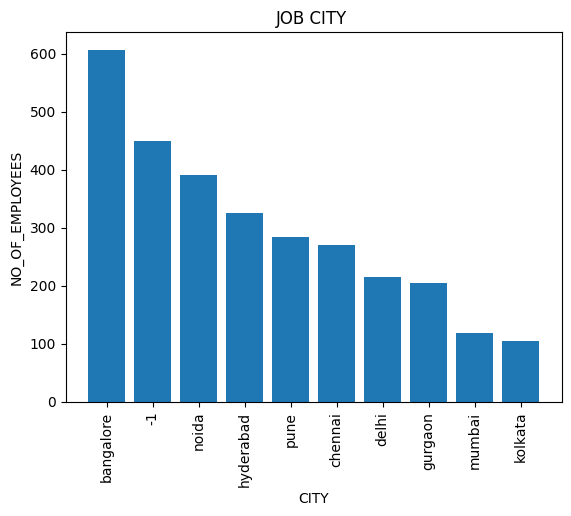

In [43]:
import matplotlib.pyplot as plt
plt.title("JOB CITY ")
plt.xlabel("CITY")
plt.ylabel("NO_OF_EMPLOYEES")
plt.xticks(rotation=90)
plt.bar(x,y)

<AxesSubplot:xlabel='Gender', ylabel='count'>

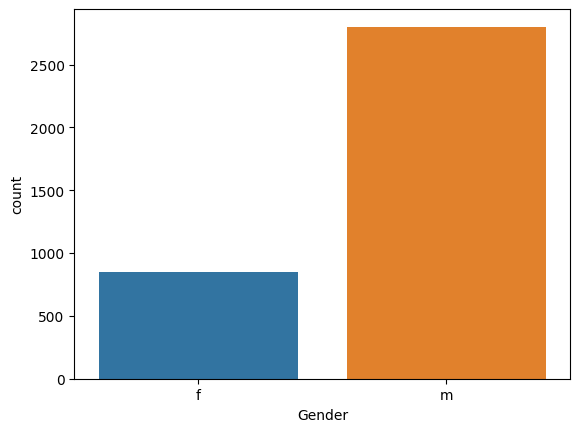

In [44]:
import seaborn as sns
sns.countplot(data=df,x=df.Gender)

In [45]:
df.Degree.unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [46]:
df.Degree.value_counts()

B.Tech/B.E.      3396
MCA               202
M.Tech./M.E.       48
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

<AxesSubplot:xlabel='Degree', ylabel='count'>

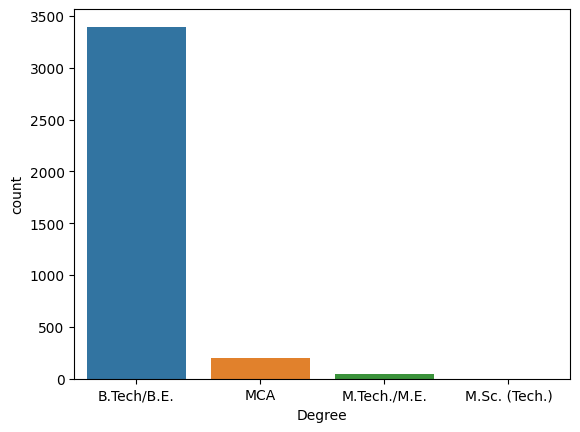

In [47]:
import seaborn as sns
sns.countplot(data=df,x=df.Degree)

In [48]:
df.Designation.value_counts()

software engineer                 513
software developer                249
system engineer                   178
programmer analyst                119
systems engineer                  108
                                 ... 
clerical assistant                  1
graphic designer                    1
html developer                      1
operational excellence manager      1
game developer                      1
Name: Designation, Length: 395, dtype: int64

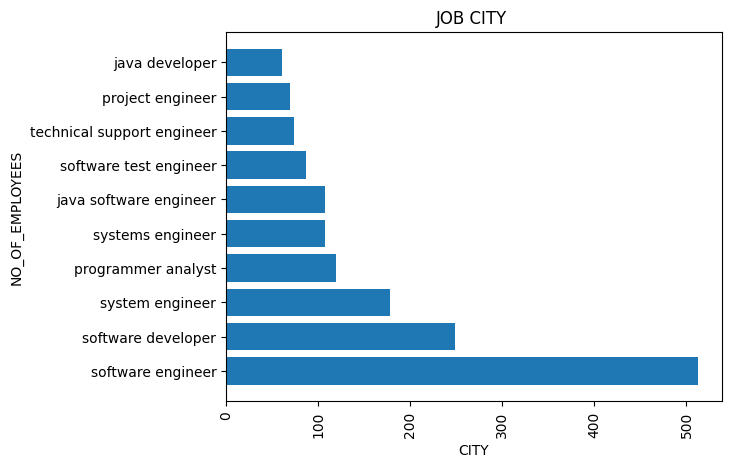

In [50]:
y=df.Designation.value_counts()[:10]
x=y.index
x,y
plt.barh(x,y)
plt.title("JOB CITY ")
plt.xlabel("CITY")
plt.ylabel("NO_OF_EMPLOYEES")
plt.xticks(rotation=90)
plt.show()

In [51]:
df.CollegeState.value_counts()

Uttar Pradesh        865
Karnataka            319
Tamil Nadu           309
Telangana            298
Maharashtra          225
Andhra Pradesh       202
Punjab               182
West Bengal          180
Madhya Pradesh       176
Haryana              173
Delhi                158
Rajasthan            158
Orissa               144
Uttarakhand          105
Kerala                30
Jharkhand             27
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                  9
Jammu and Kashmir      7
Union Territory        5
Assam                  4
Sikkim                 3
Goa                    1
Meghalaya              1
Name: CollegeState, dtype: int64

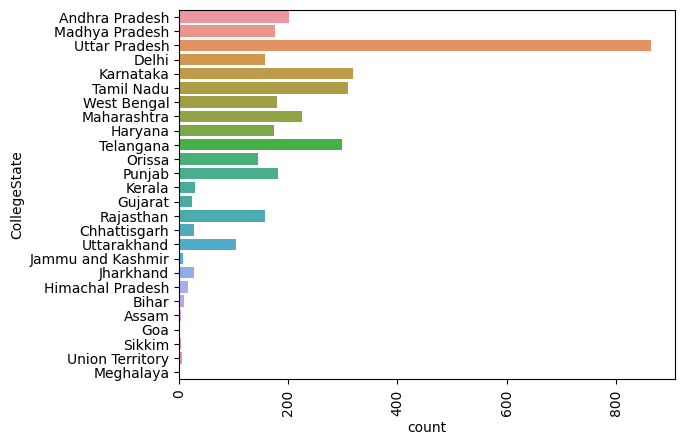

In [53]:
sns.countplot(data=df,y=df.CollegeState)
plt.xticks(rotation=90)
plt.show()

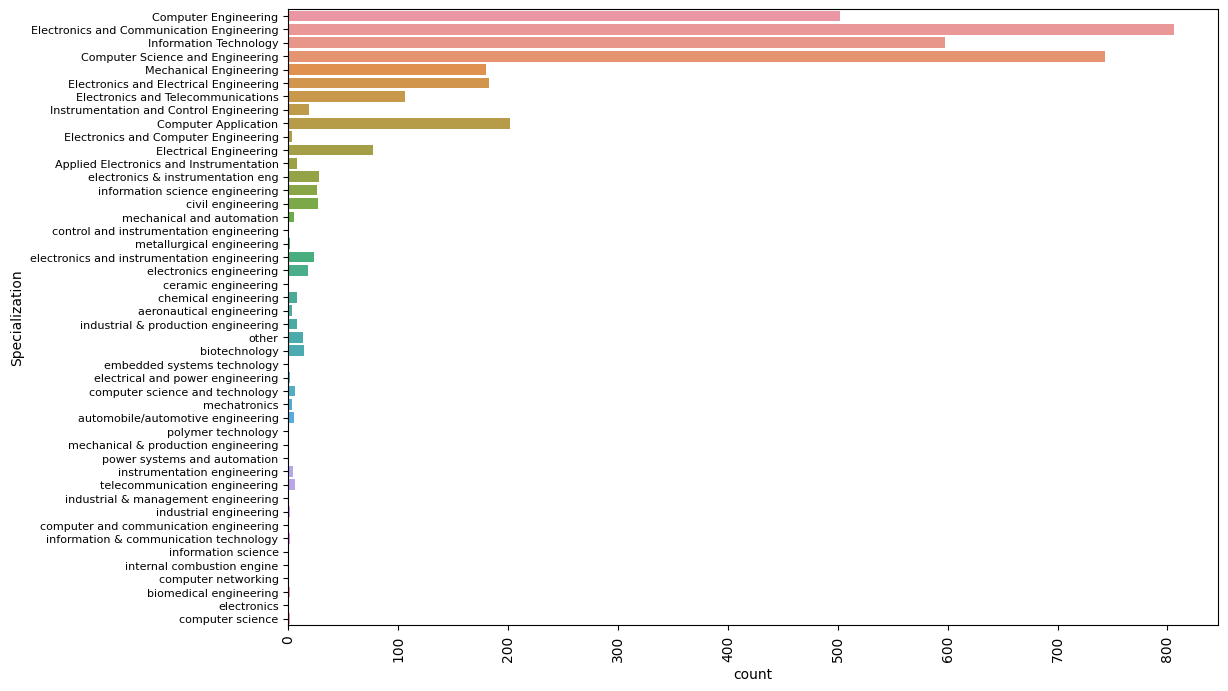

In [67]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y=df.Specialization)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=8)  
plt.show()

In [68]:
df.CollegeTier.value_counts()

2    3369
1     279
Name: CollegeTier, dtype: int64

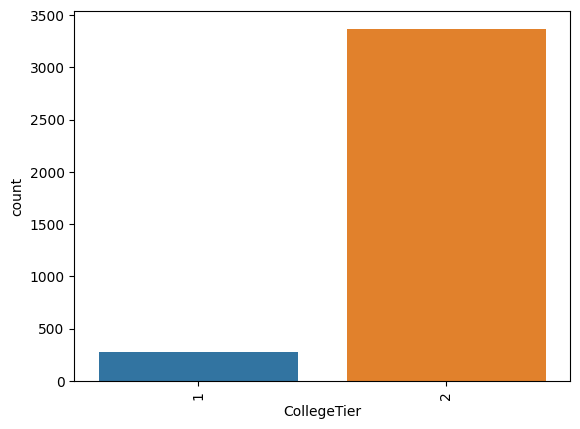

In [69]:
sns.countplot(data=df,x=df.CollegeTier)
plt.xticks(rotation=90)
plt.show()

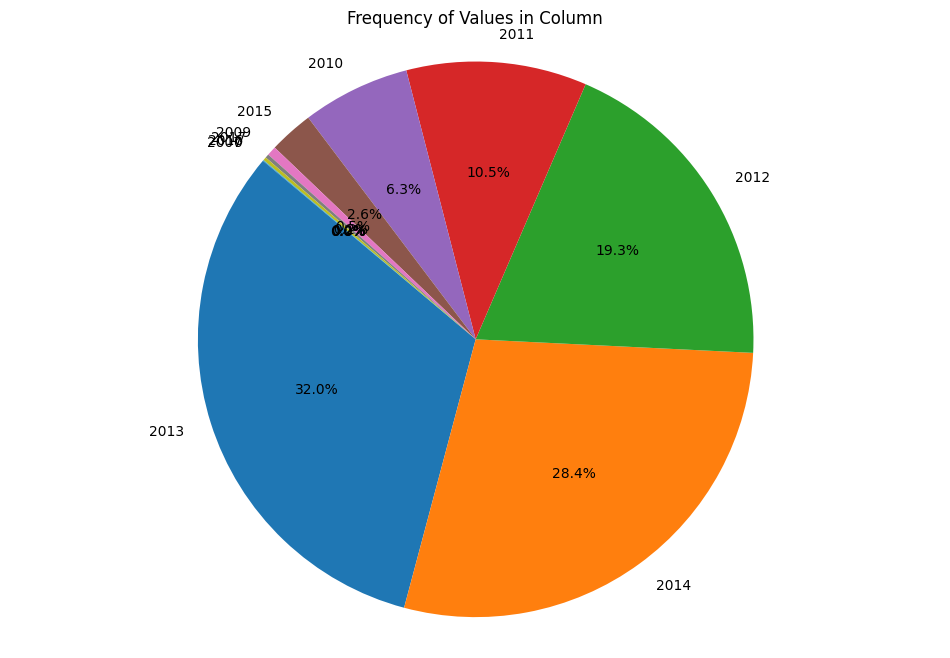

In [71]:
value_counts = df['GraduationYear'].value_counts(normalize=True)
# Plot a pie chart
plt.figure(figsize=(12, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Values in Column')
plt.axis('equal')  
plt.show()

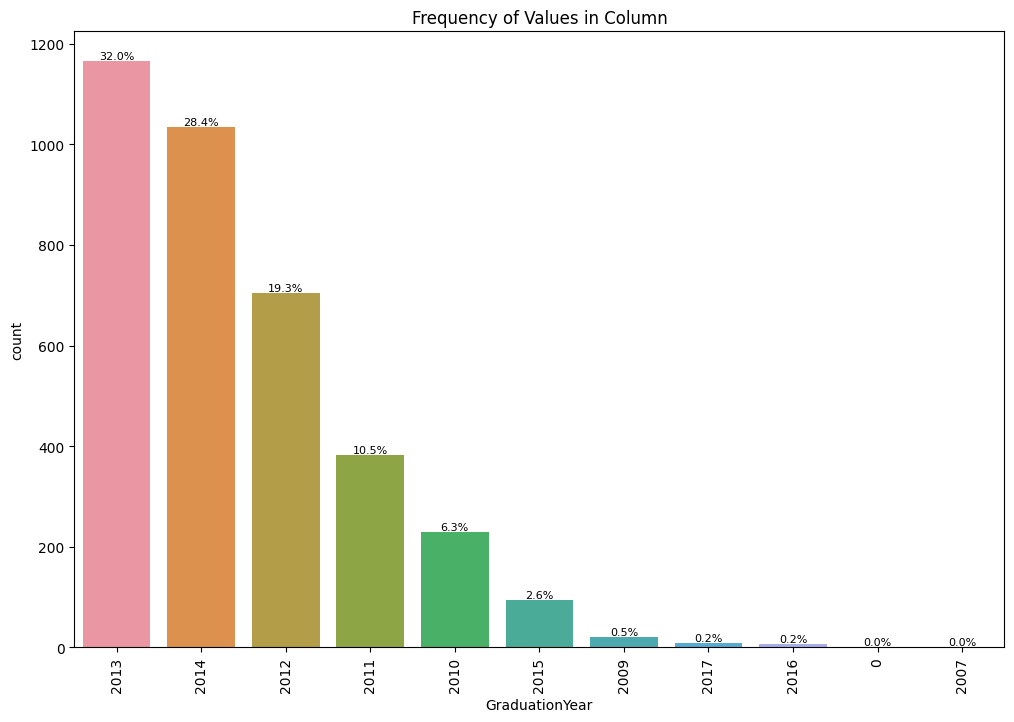

In [72]:
# Calculate value counts
value_counts = df['GraduationYear'].value_counts(normalize=True)

# Create a count plot with percentages
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='GraduationYear', order=value_counts.index)
plt.title('Frequency of Values in Column')

# Display percentages on each bar
total = len(df['GraduationYear'])
for index, value in enumerate(value_counts):
    plt.text(index, value * total, f'{value:.1%}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=90)
plt.show()


# UNIVARIATE ANALYSIS ON NUMERICAL CONTINUOUS COLUMNS

In [73]:
numerical_columns = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
                     'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
                     'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
                     'agreeableness', 'extraversion', 'nueroticism',
                     'openess_to_experience','Salary','10percentage','12percentage','collegeGPA']

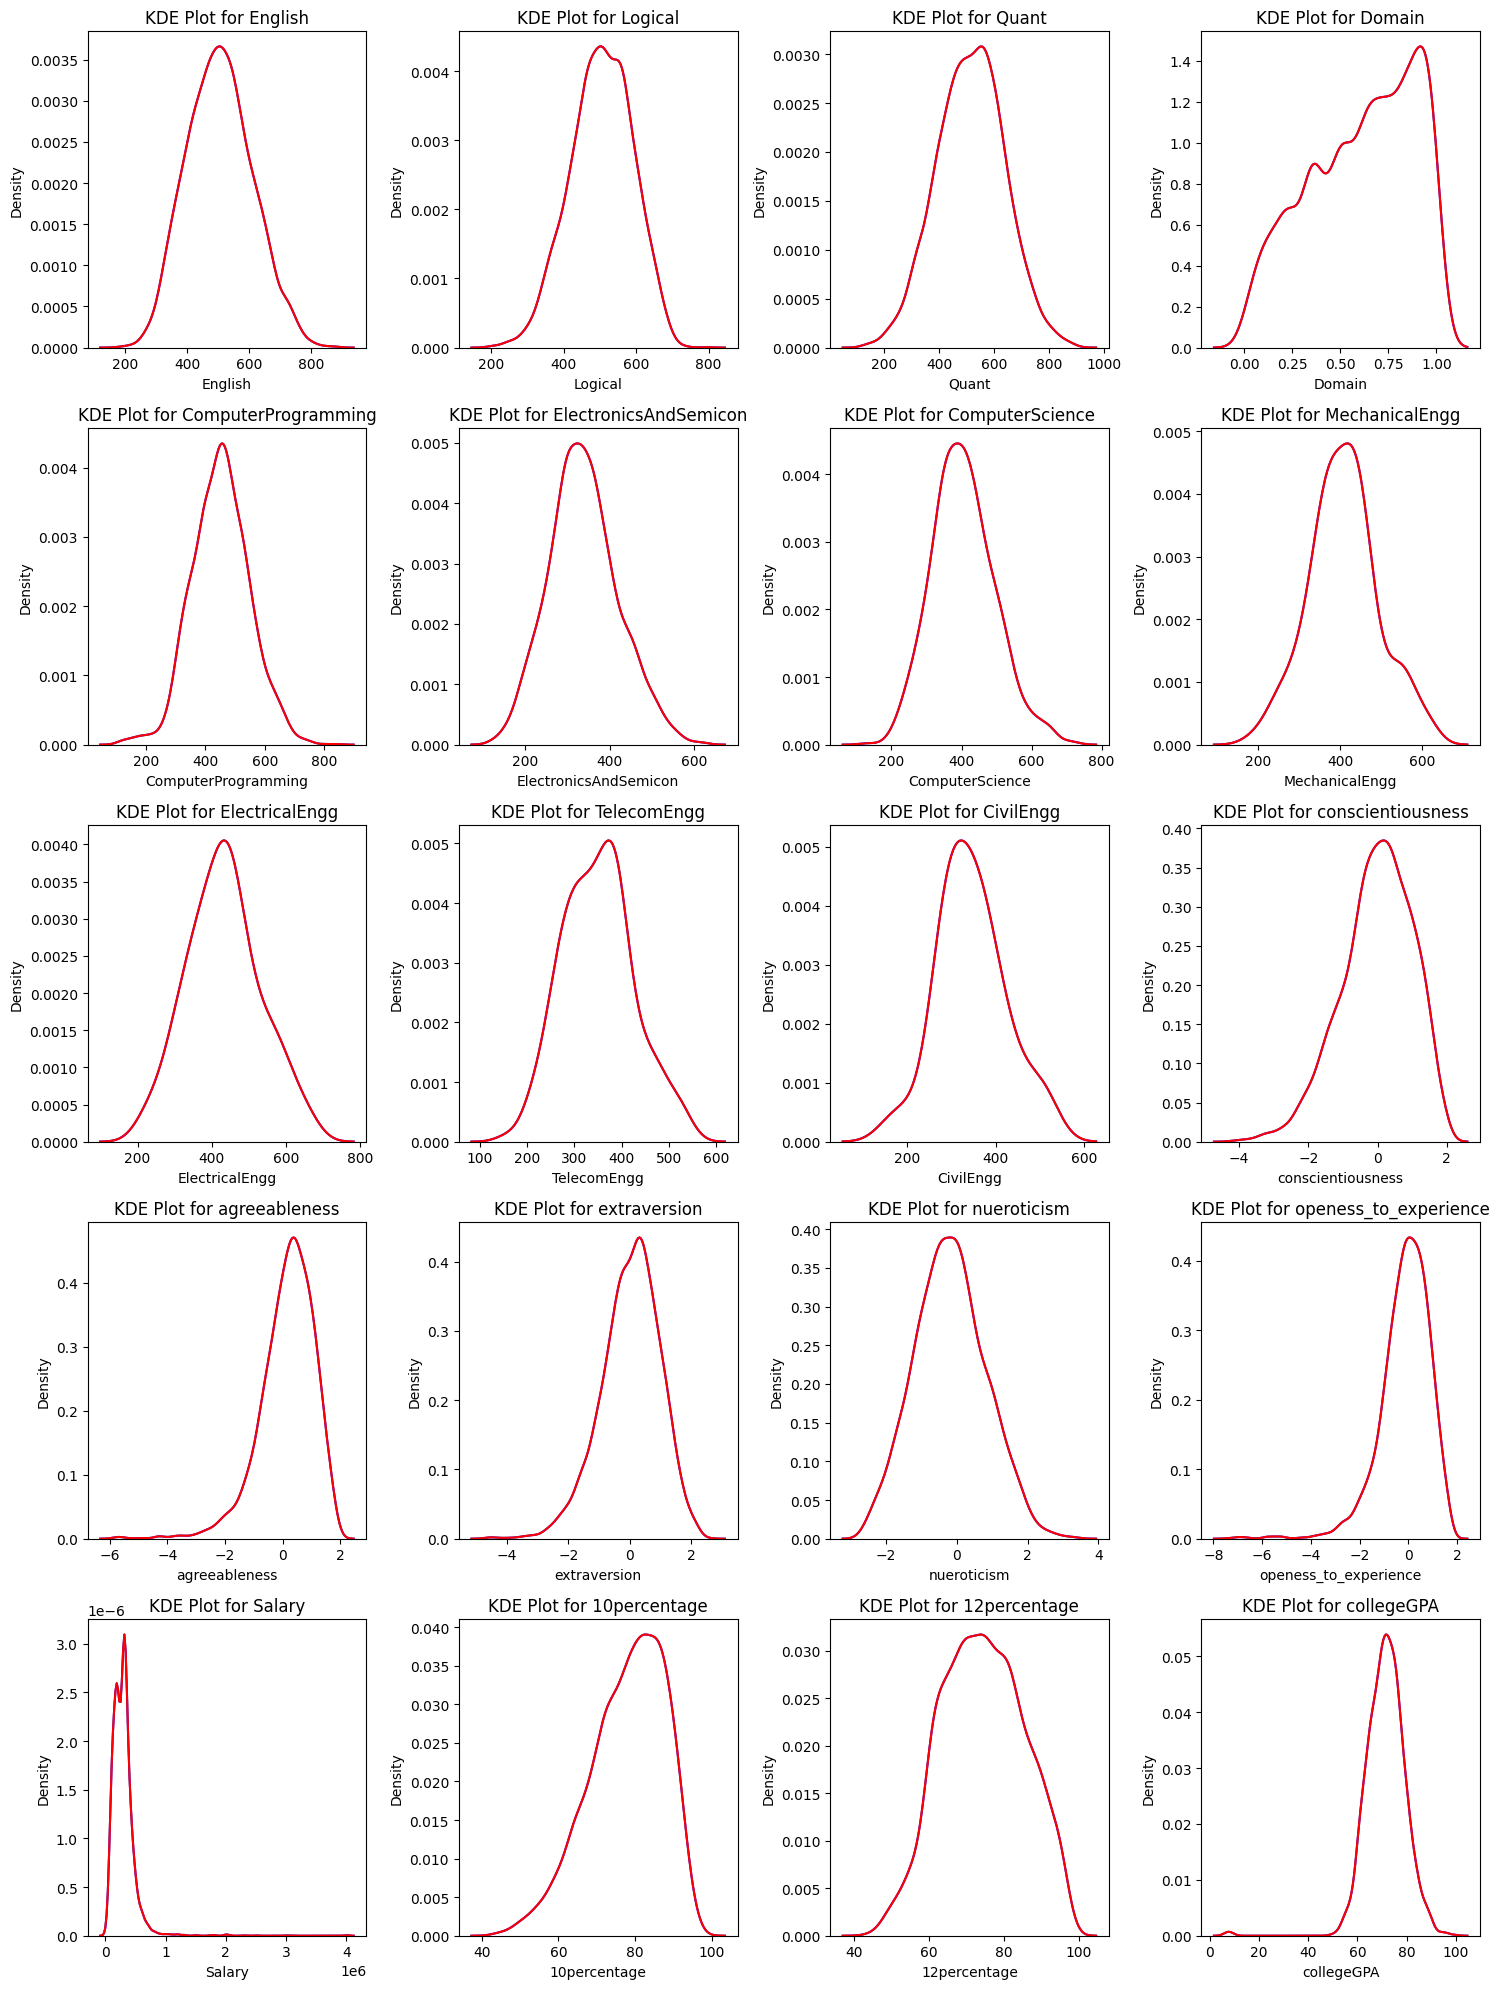

In [74]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Loop through each numerical column and create KDE plot
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df[column],color='blue', ax=axes[i])
    a=df[df[column]!=-1]
    sns.kdeplot(a[column],color='red', ax=axes[i])
    axes[i].set_title(f'KDE Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

<AxesSubplot:>

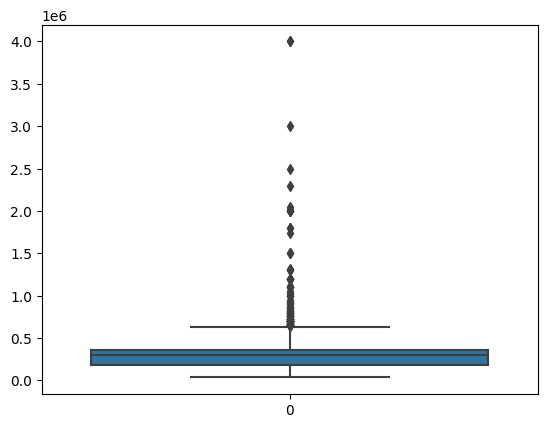

In [75]:
sns.boxplot(data=df['Salary'])

<AxesSubplot:xlabel='English', ylabel='Count'>

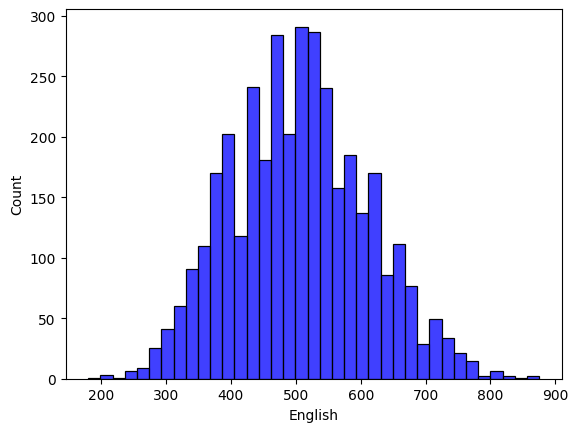

In [76]:
sns.histplot(df['English'],color='blue')

<AxesSubplot:>

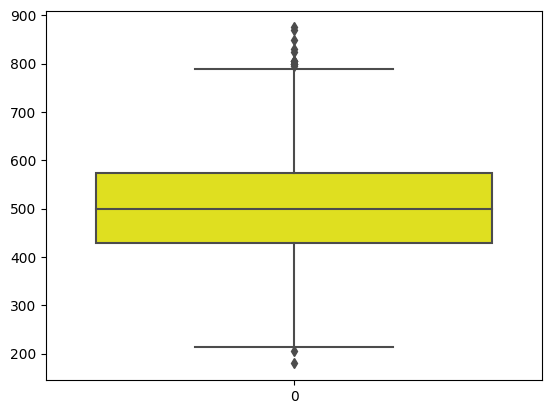

In [77]:
sns.boxplot(df['English'],color='yellow')

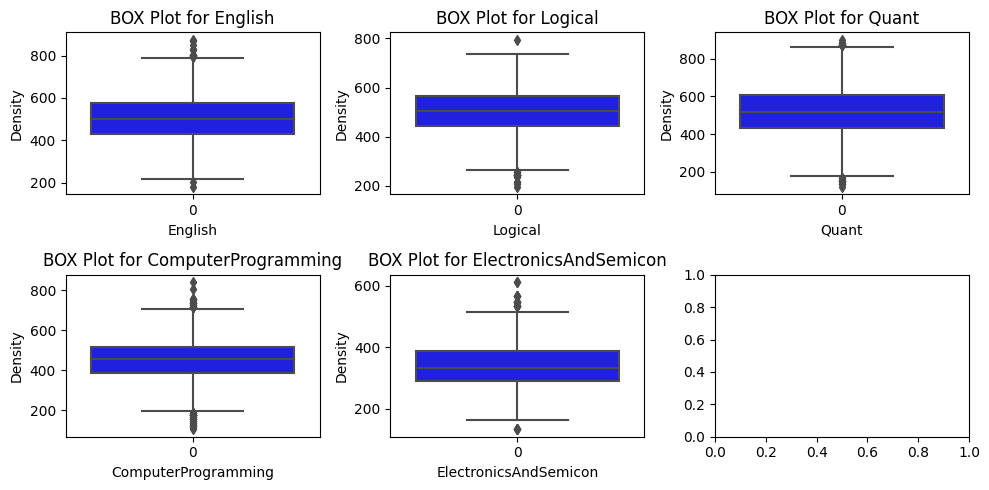

In [78]:
numerical_column = ['English', 'Logical', 'Quant', 'ComputerProgramming',
                     'ElectronicsAndSemicon']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Loop through each numerical column and create KDE plot
for i, column in enumerate(numerical_column):
    sns.boxplot(df[column],color='blue', ax=axes[i])
    axes[i].set_title(f'BOX Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

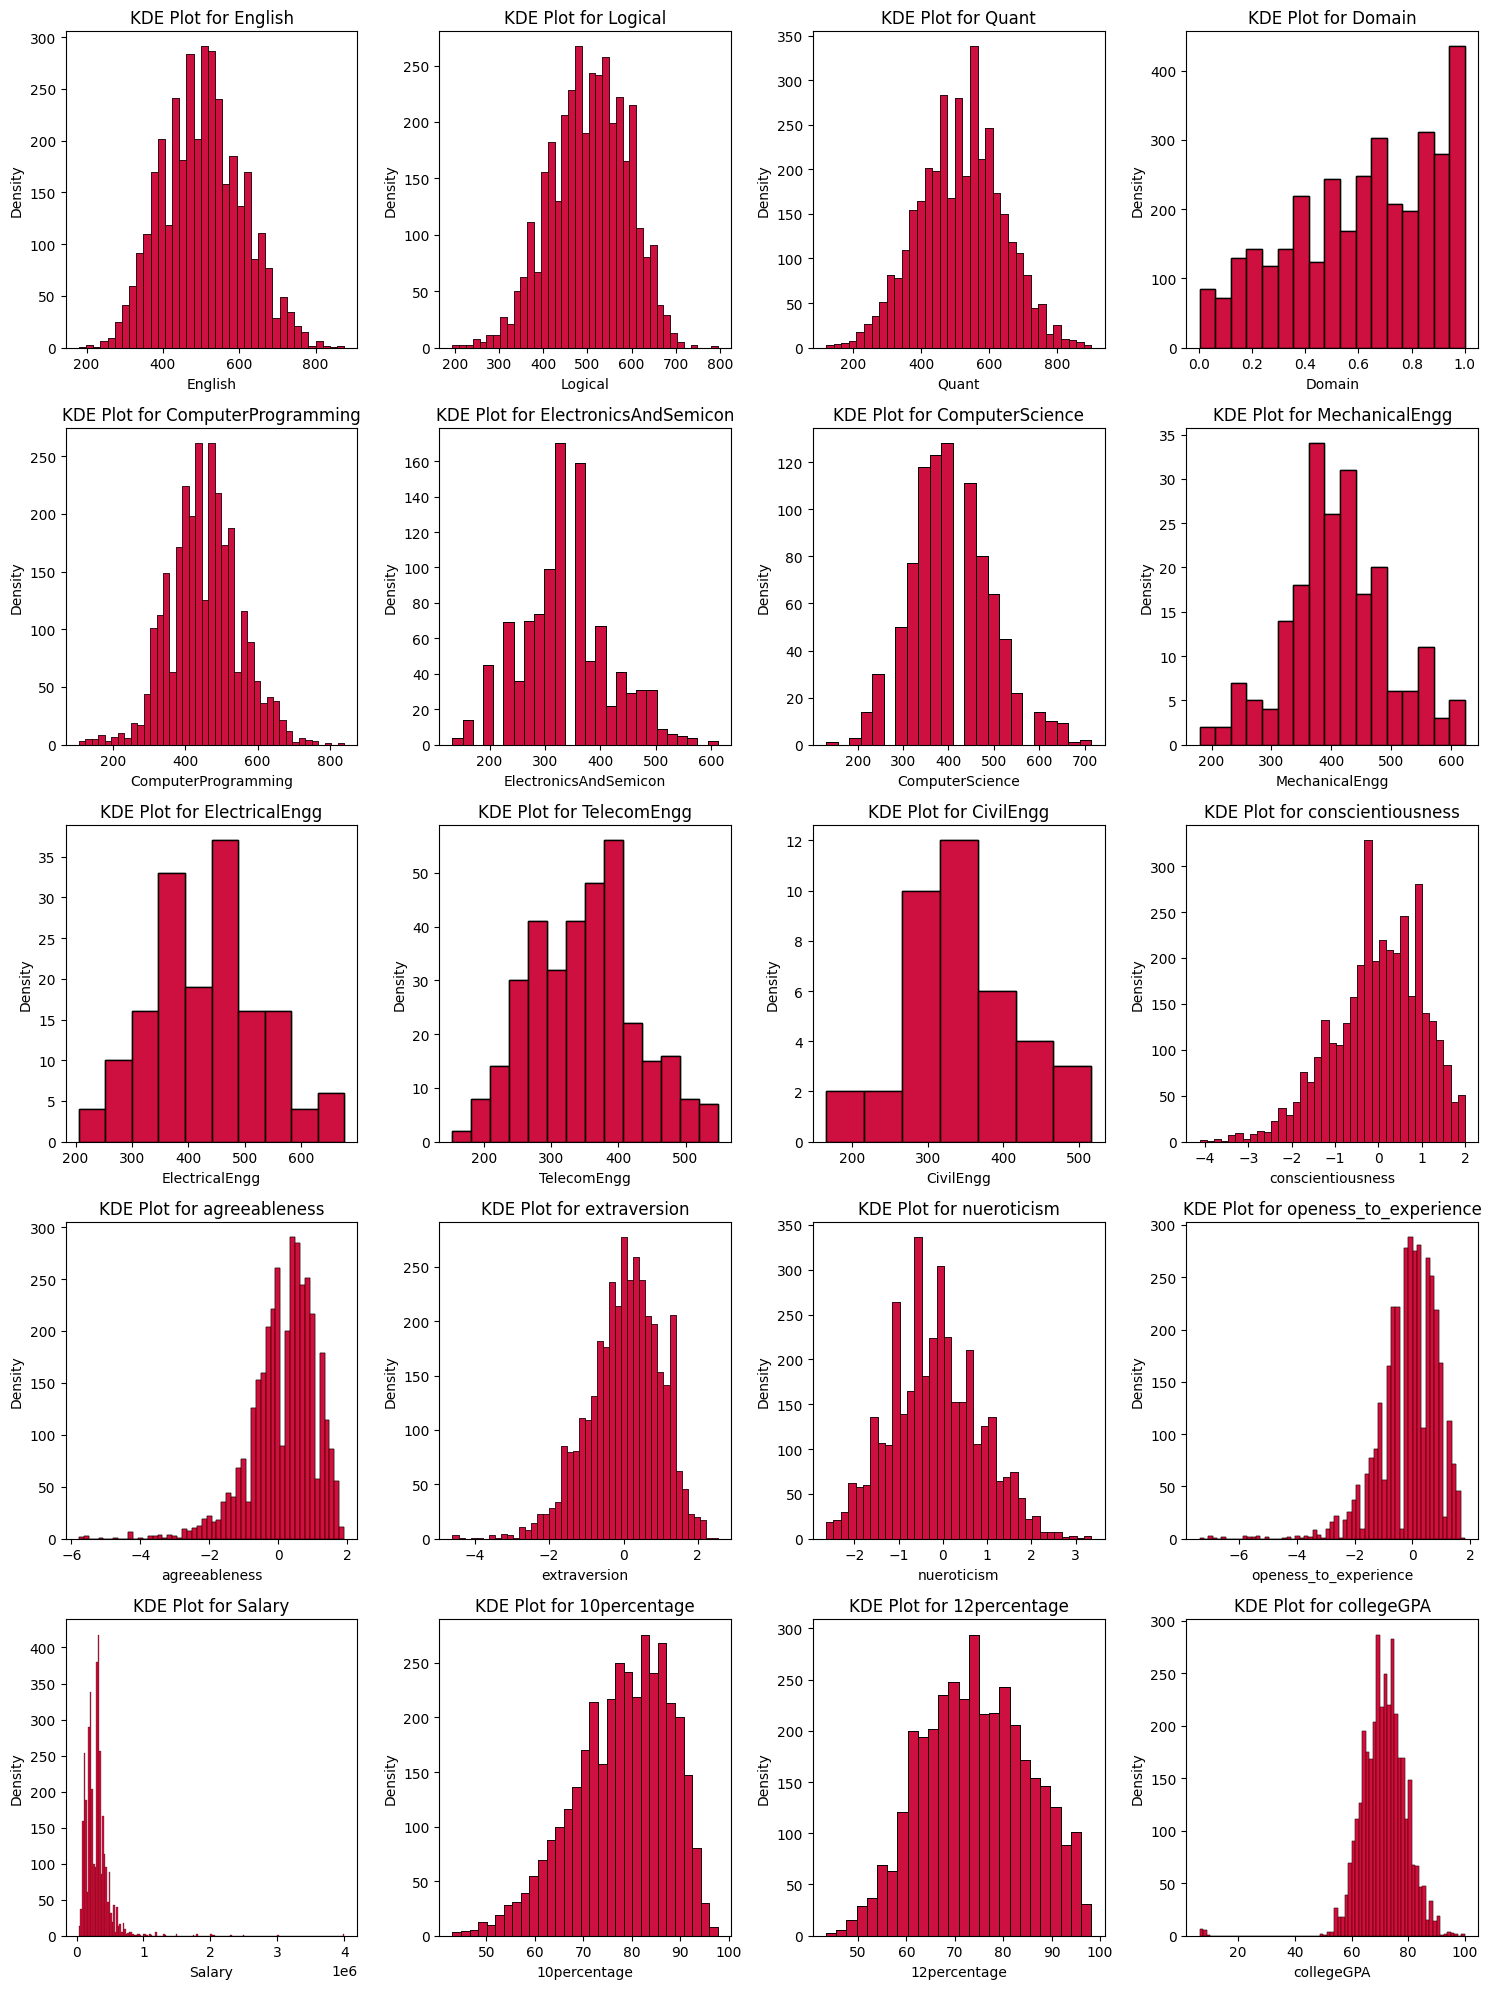

In [79]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Loop through each numerical column and create KDE plot
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column],color='blue', ax=axes[i])
    a=df[df[column]!=-1]
    sns.histplot(a[column],color='red', ax=axes[i])
    axes[i].set_title(f'KDE Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

# Step3 : Bi-Variente Analysis

In [81]:
data_grouped = df.groupby('Designation')

In [82]:
data_grouped.first()

,ID,Salary,DOJ,DOL,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Designation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
.net developer,1207660,120000.0,2014-04-01,04/01/15,hyderabad,m,1993-07-05,59.00,state,2010,87.70,Karnataka State Board,16150,2,B.Tech/B.E.,Electronics and Communication Engineering,71.04,16150,1,Telangana,2014,300,340,355,0.112139,155.0,228.0,284.0,NaN,NaN,292.0,NaN,-0.0154,-2.4516,-0.4511,0.2727,-3.1602
.net web developer,533998,240000.0,2014-05-01,23/02/24,-1,m,1988-03-21,77.00,cbse,2006,62.00,cbse,1950,2,B.Tech/B.E.,Information Technology,60.89,1950,0,Maharashtra,2014,605,520,530,0.670743,455.0,NaN,315.0,NaN,NaN,NaN,NaN,-0.2628,0.6178,0.2729,0.1798,-0.6035
account executive,302687,445000.0,2011-09-01,23/02/24,thane,m,1989-07-28,79.86,sss pune,2007,78.16,hsc pune,1950,2,B.Tech/B.E.,Electronics and Telecommunications,58.26,1950,0,Maharashtra,2011,455,445,455,0.229482,365.0,266.0,NaN,NaN,NaN,260.0,NaN,-2.1175,-1.6833,1.1074,1.0024,-0.2875
account manager,669977,350000.0,2013-08-01,23/02/24,noida,m,1991-03-06,85.00,cbse,2009,76.00,cbse,9699,2,B.Tech/B.E.,Computer Engineering,71.00,9699,1,Rajasthan,2013,570,520,430,0.819417,505.0,NaN,NaN,NaN,NaN,NaN,NaN,1.5644,1.2114,0.6248,0.3995,0.8637
admin assistant,1268410,105000.0,2015-01-01,04/01/15,-1,m,1992-11-26,80.00,cbse,2010,62.00,cbse,78,2,B.Tech/B.E.,Computer Science and Engineering,61.00,78,0,Uttar Pradesh,2014,490,530,520,0.842248,485.0,NaN,469.0,NaN,NaN,NaN,NaN,-0.7335,0.3789,0.1637,0.1459,-1.0524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web designer and seo,1284437,200000.0,2015-01-01,07/01/15,bikaner,f,1992-11-16,90.60,cbse,2010,78.80,cbse,6874,2,B.Tech/B.E.,Computer Science and Engineering,79.57,6874,0,Uttarakhand,2015,830,455,545,0.884123,535.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5591,0.8784,0.7785,-1.3753,0.4805
web developer,30122,100000.0,2011-07-01,05/01/12,noida,m,1985-07-20,51.00,up,2004,48.00,UP Board,350,2,MCA,Computer Application,59.00,350,0,Uttar Pradesh,2010,275,365,395,0.525923,415.0,333.0,438.0,NaN,NaN,233.0,NaN,0.2009,-0.2793,0.2366,1.4724,0.0284
web intern,1193240,205000.0,2014-04-01,05/01/14,gurgaon,f,1992-02-28,88.80,cbse,2008,70.20,cbse,16673,2,B.Tech/B.E.,Computer Science and Engineering,71.00,16673,0,Haryana,2013,455,555,405,0.842248,445.0,NaN,469.0,NaN,NaN,NaN,NaN,1.1336,0.0459,0.3174,-1.8824,-0.0943


In [83]:
df['Designation'] = df['Designation'].replace('systems engineer','system engineer')

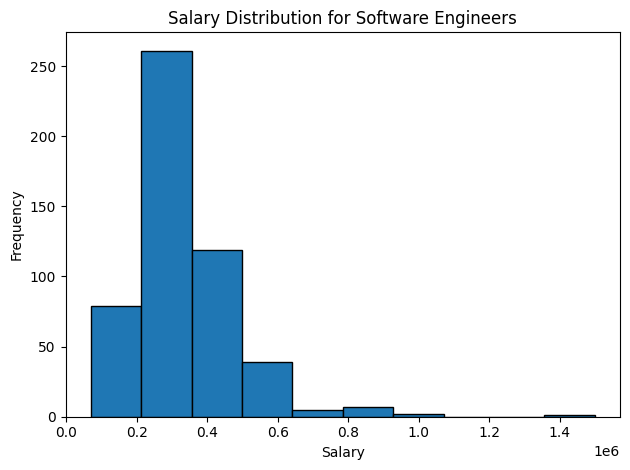

In [90]:
# Your existing code to plot the histogram for the 'software engineer' group
data_grouped.get_group('software engineer')['Salary'].plot(kind='hist', edgecolor='black')

# Adding labels and a title
plt.xlabel('Salary') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.title('Salary Distribution for Software Engineers') # Plot title

# Optional: Improve layout to avoid label cut-offs
plt.tight_layout()

# Display the plot
plt.show()


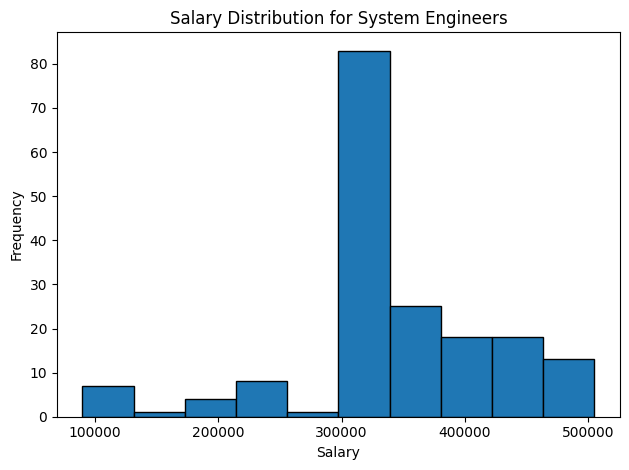

In [92]:
data_grouped.get_group('system engineer')['Salary'].plot(kind='hist', edgecolor='black')

# Adding labels and a title
plt.xlabel('Salary')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Salary Distribution for System Engineers')  # Plot title

# Optional: Improve layout to avoid label cut-offs
plt.tight_layout()

# Display the plot
plt.show()

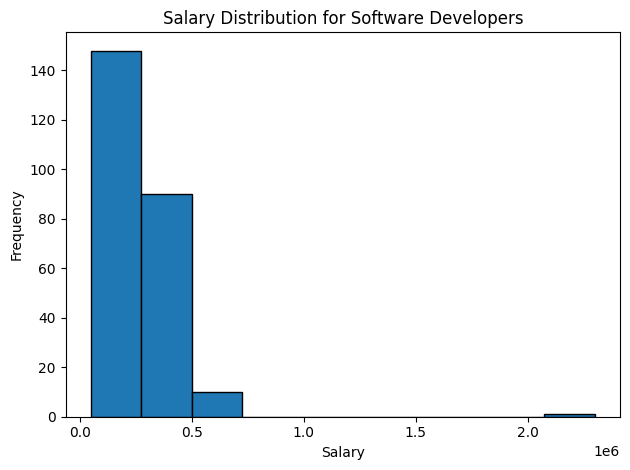

In [93]:
data_grouped.get_group('software developer')['Salary'].plot(kind='hist', edgecolor='black')

# Adding labels and a title
plt.xlabel('Salary') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.title('Salary Distribution for Software Developers') # Plot title

# Optional: Improve layout to avoid label cut-offs
plt.tight_layout()

# Display the plot
plt.show()


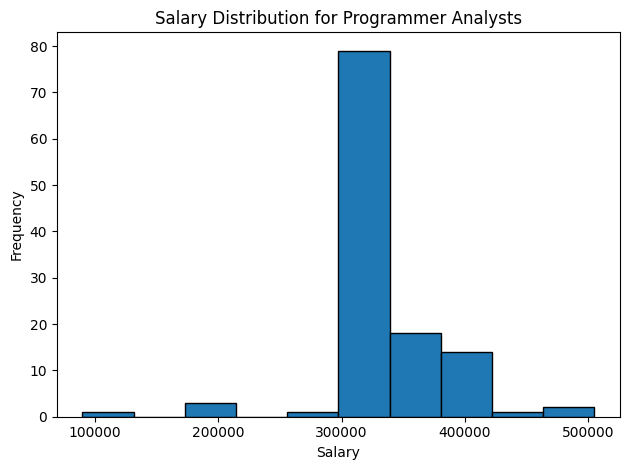

In [94]:
data_grouped.get_group('programmer analyst')['Salary'].plot(kind='hist', edgecolor='black')

# Adding labels and a title
plt.xlabel('Salary')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Salary Distribution for Programmer Analysts')  # Plot title

# Optional: Improve layout to avoid label cut-offs
plt.tight_layout()

# Display the plot
plt.show()


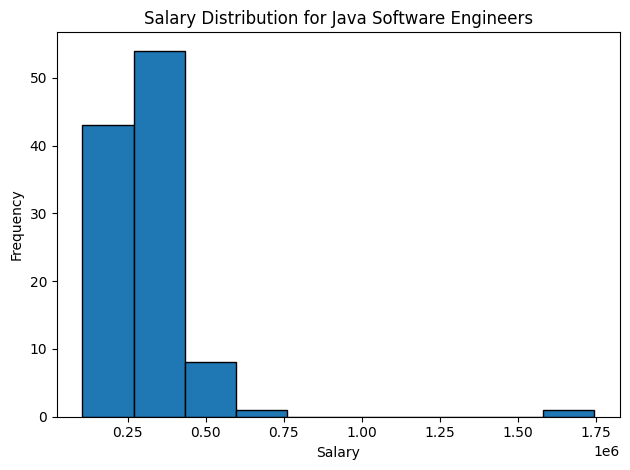

In [95]:

data_grouped.get_group('java software engineer')['Salary'].plot(kind='hist', edgecolor='black')

# Adding labels and a title
plt.xlabel('Salary')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Salary Distribution for Java Software Engineers')  # Plot title

# Optional: Improve layout to avoid label cut-offs
plt.tight_layout()

# Display the plot
plt.show()


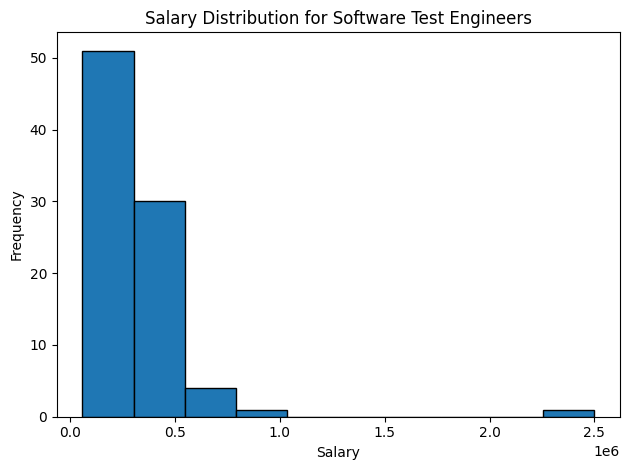

In [96]:
data_grouped.get_group('software test engineer')['Salary'].plot(kind='hist', edgecolor='black')

# Adding labels and a title
plt.xlabel('Salary')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Salary Distribution for Software Test Engineers')  # Plot title

# Optional: Improve layout to avoid label cut-offs
plt.tight_layout()

# Display the plot
plt.show()
